## FLAML for hp optimisation and model selection
We use FLAML twice, first to find the best component model for each estimator, and then to optimise the estimators themselves and choose the best estimator. Here we show how it's done

In [15]:
%load_ext autoreload
%autoreload 2
import os, sys
import warnings
import subprocess
try:
    import matplotlib
except ModuleNotFoundError:
    # not part of package requirements, so install if needed
    subprocess.check_call([sys.executable, "-m", "pip", "install", "matplotlib"])
finally:
    import matplotlib
    import matplotlib.pyplot as plt
    import matplotlib.ticker as mtick

# warnings.filterwarnings('ignore') # suppress sklearn deprecation warnings for now.. 

# the below checks for whether we run dowhy and auto-causality from source
root_path = root_path = os.path.realpath('../..')
try: 
    import auto_causality
except ModuleNotFoundError:
    sys.path.append(os.path.join(root_path, "auto-causality"))
    
try:
    import dowhy
except ModuleNotFoundError:
    sys.path.append(os.path.join(root_path, "dowhy"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
from auto_causality import AutoCausality
from auto_causality.datasets import synth_ihdp, preprocess_dataset
from auto_causality.scoring import ate

### Model fitting & scoring
Here we fit a (selection of) model(s) to the data and score them with the ERUPT metric on held-out data

In [17]:
# import dataset
data_df = synth_ihdp()
data_df, features_X, features_W, targets, treatment = preprocess_dataset(data_df)
outcome = targets[0]


# init autocausality object with chosen metric to optimise
ac = AutoCausality(
    time_budget=180, 
    estimator_list="auto", 
    metric="erupt", 
    verbose=3,
    components_verbose=2,
    components_time_budget=2,
    use_ray=False,    
    try_init_configs=True
)

# run autocausality
myresults = ac.fit(data_df, treatment, outcome, features_W, features_X)

# return best estimator
print(f"Best estimator: {ac.best_estimator}")
# config of best estimator:
print(f"best config: {ac.best_config}")
# best score:
print(f"best score: {ac.best_score}")


Using all available estimators...
[flaml.automl: 04-01 12:14:26] {2211} WARNING - Time taken to find the best model is 82% of the provided time budget and not all estimators' hyperparameter search converged. Consider increasing the time budget.
Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
[flaml.automl: 04-01 12:14:32] {2211} WARNING - Time taken to find the best model is 88% of the provided time budget and not all estimators' hyperparameter search converged. Consider increasing the time budget.
Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
[flaml.tune.tune: 04-01 12:14:32] {326} WARNING - Using CFO for search. To use BlendSearch, run: pip install flaml[blendsearch]
[flaml.tune.tune: 04-01 12:14:32] {447} INFO - trial 1 config: {'estimator': {'estimator_name': 'backdoor.auto_cau

{'estimator_name': 'backdoor.auto_causality.models.Dummy'}


[flaml.tune.tune: 04-01 12:14:38] {108} INFO - result: {'erupt': 6.244512886836611, 'qini': -0.03093631405522567, 'auc': 0.4985753999725703, 'ate': 3.8308715019592987, 'r_score': 0.0012484090168887185, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x0000016E6310D820>, 'scores': {'estimator_name': 'backdoor.auto_causality.models.Dummy', 'train': {'erupt': 6.481956354054539, 'qini': 0.04382605067837127, 'auc': 0.49811553337320086, 'r_score': -0.005651213059930438, 'ate': 4.070621618450473, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x0000016E633825B0>, 'values':      treated  y_factual         p  policy  weights
0        0.0   0.686154  0.184255    True      0.0
1        0.0   4.079959  0.184255    True      0.0
2        0.0   2.306089  0.184255    True      0.0
3        0.0   1.881218  0.184255    True      0.0
4        0.0   4.520767  0.184255    True      0.0
..       ...        ...       ...     ...      ...
592      0.0   2.22

{'estimator_name': 'backdoor.propensity_score_weighting'}


[flaml.tune.tune: 04-01 12:14:43] {108} INFO - result: {'erupt': -inf, 'exception': KeyError('init_params'), 'training_iteration': 0, 'config': {'estimator': {'estimator_name': 'backdoor.propensity_score_weighting'}}, 'config/estimator': {'estimator_name': 'backdoor.propensity_score_weighting'}, 'experiment_tag': 'exp', 'time_total_s': 5.445903301239014}
[flaml.tune.tune: 04-01 12:14:43] {447} INFO - trial 3 config: {'estimator': {'estimator_name': 'backdoor.econml.metalearners.SLearner'}}


{'estimator_name': 'backdoor.econml.metalearners.SLearner'}


[flaml.tune.tune: 04-01 12:14:46] {108} INFO - result: {'erupt': 6.244512886836611, 'qini': 0.006953526623428218, 'auc': 0.5495363354006876, 'ate': 3.9890214841554705, 'r_score': 0.0459606592035553, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x0000016E61051160>, 'scores': {'estimator_name': 'backdoor.econml.metalearners.SLearner', 'train': {'erupt': 6.481956354054539, 'qini': 0.10610831076125021, 'auc': 0.5805616565910265, 'r_score': 0.09037422074647206, 'ate': 4.005087871454177, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x0000016E635EF910>, 'values':      treated  y_factual         p  policy  weights
0        0.0   0.686154  0.184255    True      0.0
1        0.0   4.079959  0.184255    True      0.0
2        0.0   2.306089  0.184255    True      0.0
3        0.0   1.881218  0.184255    True      0.0
4        0.0   4.520767  0.184255    True      0.0
..       ...        ...       ...     ...      ...
592      0.0   2.220386 

{'estimator_name': 'backdoor.econml.metalearners.TLearner'}


[flaml.tune.tune: 04-01 12:14:50] {108} INFO - result: {'erupt': 6.244512886836611, 'qini': -0.018363170219241106, 'auc': 0.5284825669525802, 'ate': 4.081062598213048, 'r_score': 0.002337985231804063, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x0000016E6328AFA0>, 'scores': {'estimator_name': 'backdoor.econml.metalearners.TLearner', 'train': {'erupt': 6.485497164178989, 'qini': 0.056489752123252246, 'auc': 0.5642176468909682, 'r_score': 0.055655047275659286, 'ate': 4.033678522641956, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x0000016E638BA550>, 'values':      treated  y_factual         p  policy  weights
0        0.0   0.686154  0.184255    True      0.0
1        0.0   4.079959  0.184255    True      0.0
2        0.0   2.306089  0.184255    True      0.0
3        0.0   1.881218  0.184255    True      0.0
4        0.0   4.520767  0.184255    True      0.0
..       ...        ...       ...     ...      ...
592      0.0   2.220

{'estimator_name': 'backdoor.econml.metalearners.XLearner'}


[flaml.tune.tune: 04-01 12:14:59] {108} INFO - result: {'erupt': 6.244512886836611, 'qini': -0.009850556924408125, 'auc': 0.5194266211066639, 'ate': 4.1050904717677685, 'r_score': 0.02297860453648537, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x0000016E63219CD0>, 'scores': {'estimator_name': 'backdoor.econml.metalearners.XLearner', 'train': {'erupt': 6.481956354054539, 'qini': 0.09769216420406004, 'auc': 0.5647365512481872, 'r_score': 0.041043817811672656, 'ate': 4.070757157712787, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x0000016E63A891F0>, 'values':      treated  y_factual         p  policy  weights
0        0.0   0.686154  0.184255    True      0.0
1        0.0   4.079959  0.184255    True      0.0
2        0.0   2.306089  0.184255    True      0.0
3        0.0   1.881218  0.184255    True      0.0
4        0.0   4.520767  0.184255    True      0.0
..       ...        ...       ...     ...      ...
592      0.0   2.2203

{'estimator_name': 'backdoor.econml.metalearners.DomainAdaptationLearner'}


[flaml.tune.tune: 04-01 12:15:05] {108} INFO - result: {'erupt': 6.23288092316558, 'qini': -0.005922142730282486, 'auc': 0.5290917957167619, 'ate': 3.99001247795677, 'r_score': 0.023847970259356144, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x0000016E634AB5E0>, 'scores': {'estimator_name': 'backdoor.econml.metalearners.DomainAdaptationLearner', 'train': {'erupt': 6.488096158055082, 'qini': 0.08065657622147851, 'auc': 0.5817420327747668, 'r_score': 0.08570980628068314, 'ate': 4.000804493600813, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x0000016E63D55610>, 'values':      treated  y_factual         p  policy  weights
0        0.0   0.686154  0.184255    True      0.0
1        0.0   4.079959  0.184255    True      0.0
2        0.0   2.306089  0.184255    True      0.0
3        0.0   1.881218  0.184255    True      0.0
4        0.0   4.520767  0.184255    True      0.0
..       ...        ...       ...     ...      ...
592      

{'estimator_name': 'backdoor.econml.dr.ForestDRLearner', 'min_propensity': 1e-06, 'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.0, 'max_features': 'auto', 'min_impurity_decrease': 0.0, 'max_samples': 0.45, 'min_balancedness_tol': 0.45, 'honest': 1, 'subforest_size': 4}


[flaml.tune.tune: 04-01 12:15:11] {108} INFO - result: {'erupt': 6.244512886836611, 'qini': 0.02840737329223019, 'auc': 0.5339517809795786, 'ate': 3.9578894474686286, 'r_score': 0.025219014094127523, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x0000016E596B8640>, 'scores': {'estimator_name': 'backdoor.econml.dr.ForestDRLearner', 'train': {'erupt': 6.481956354054539, 'qini': 0.09664454502295414, 'auc': 0.586334592539528, 'r_score': 0.05297914393549519, 'ate': 3.966366737560003, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x0000016E65361100>, 'values':      treated  y_factual         p  policy  weights
0        0.0   0.686154  0.184255    True      0.0
1        0.0   4.079959  0.184255    True      0.0
2        0.0   2.306089  0.184255    True      0.0
3        0.0   1.881218  0.184255    True      0.0
4        0.0   4.520767  0.184255    True      0.0
..       ...        ...       ...     ...      ...
592      0.0   2.220386  0.

{'estimator_name': 'backdoor.econml.dr.LinearDRLearner', 'fit_cate_intercept': 1, 'min_propensity': 1e-06}


[flaml.tune.tune: 04-01 12:15:16] {108} INFO - result: {'erupt': 6.244512886836611, 'qini': 0.007115145058838703, 'auc': 0.5175015008508209, 'ate': 4.026083009095628, 'r_score': -0.021196532367722787, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x0000016E5A84A490>, 'scores': {'estimator_name': 'backdoor.econml.dr.LinearDRLearner', 'train': {'erupt': 6.481956354054539, 'qini': 0.04214703491192439, 'auc': 0.5584674197416435, 'r_score': 0.03737291296060985, 'ate': 3.9843769674410137, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x0000016E63C58C10>, 'values':      treated  y_factual         p  policy  weights
0        0.0   0.686154  0.184255    True      0.0
1        0.0   4.079959  0.184255    True      0.0
2        0.0   2.306089  0.184255    True      0.0
3        0.0   1.881218  0.184255    True      0.0
4        0.0   4.520767  0.184255    True      0.0
..       ...        ...       ...     ...      ...
592      0.0   2.220386 

{'estimator_name': 'backdoor.econml.dr.SparseLinearDRLearner', 'fit_cate_intercept': 1, 'n_alphas': 100, 'n_alphas_cov': 10, 'min_propensity': 1e-06, 'tol': 9.999999999999999e-05, 'max_iter': 10000, 'mc_agg': 'mean'}


[flaml.tune.tune: 04-01 12:15:20] {108} INFO - result: {'erupt': 6.244512886836611, 'qini': 0.09386512292800962, 'auc': 0.5170369923046019, 'ate': 3.830554571946462, 'r_score': -0.06254839513330235, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x0000016E5614A400>, 'scores': {'estimator_name': 'backdoor.econml.dr.SparseLinearDRLearner', 'train': {'erupt': 6.481646185424929, 'qini': 0.17175329511007303, 'auc': 0.5472360491265743, 'r_score': 0.0162410141951983, 'ate': 3.865867441223694, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x0000016E63CEA8E0>, 'values':      treated  y_factual         p  policy  weights
0        0.0   0.686154  0.184255    True      0.0
1        0.0   4.079959  0.184255    True      0.0
2        0.0   2.306089  0.184255    True      0.0
3        0.0   1.881218  0.184255    True      0.0
4        0.0   4.520767  0.184255    True      0.0
..       ...        ...       ...     ...      ...
592      0.0   2.22038

{'estimator_name': 'backdoor.econml.dml.LinearDML', 'fit_cate_intercept': 1, 'mc_agg': 'mean'}


[flaml.tune.tune: 04-01 12:15:25] {108} INFO - result: {'erupt': 6.238723688880317, 'qini': 0.04413178139730617, 'auc': 0.5224825233527202, 'ate': 3.645720957745886, 'r_score': -0.10351782543249022, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x0000016E638D6400>, 'scores': {'estimator_name': 'backdoor.econml.dml.LinearDML', 'train': {'erupt': 6.469271727181885, 'qini': 0.09105631704540858, 'auc': 0.5458109519096657, 'r_score': 0.044219406949585705, 'ate': 3.6366692394692897, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x0000016E63EE7FA0>, 'values':      treated  y_factual         p  policy  weights
0        0.0   0.686154  0.184255    True      0.0
1        0.0   4.079959  0.184255    True      0.0
2        0.0   2.306089  0.184255    True      0.0
3        0.0   1.881218  0.184255    True      0.0
4        0.0   4.520767  0.184255    True      0.0
..       ...        ...       ...     ...      ...
592      0.0   2.220386  0.184

... Estimator: backdoor.auto_causality.models.Dummy
 erupt (validation): 6.244513
 qini (validation): -0.030936
 auc (validation): 0.498575
 ate (validation): 3.830872
 r_score (validation): 0.001248
Best estimator: backdoor.auto_causality.models.Dummy
best config: {'estimator': {'estimator_name': 'backdoor.auto_causality.models.Dummy'}}
best score: 6.244512886836611


In [7]:
outcome = targets[0]
baseline_scores={"estimator": "baseline",
                               "outcome": outcome,
                              "train":{"erupt": ac.train_df[outcome].mean(),
                                       "ate": ate(ac.train_df[treatment],ac.train_df[outcome])[0]},
                              "validation":{"erupt": ac.test_df[outcome].mean(),
                                      "ate": ate(ac.test_df[treatment],ac.test_df[outcome])[0]}}
ac.full_scores = {"baseline": baseline_scores, **ac.full_scores}

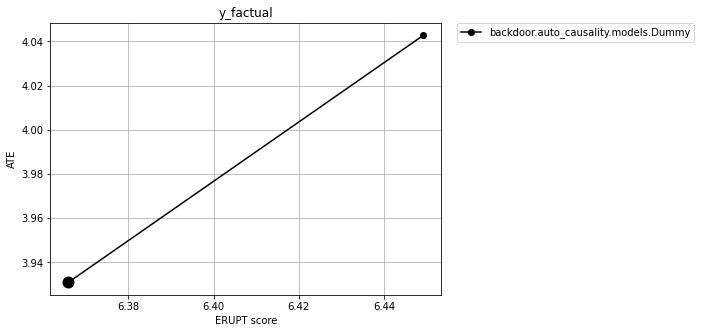

In [9]:
%matplotlib inline

colors = ([matplotlib.colors.CSS4_COLORS['black']] +
    list(matplotlib.colors.TABLEAU_COLORS) + [
    matplotlib.colors.CSS4_COLORS['lime'],
    matplotlib.colors.CSS4_COLORS['yellow'],
    matplotlib.colors.CSS4_COLORS['pink']
])

v = ac.full_scores
plt.figure(figsize = (7,5))
plt.title(outcome)
for (est, scr),col in zip(v.items(),colors):
    sc = [scr['train']['erupt'], scr['validation']['erupt']]
    crv = [scr['train']['ate'], scr['validation']['ate']]
    plt.plot(sc, crv, color=col, marker="o")
    plt.scatter(sc[1:],crv[1:], c=col, s=120 )
    plt.xlabel("ERUPT score")
    plt.ylabel("ATE")

    plt.legend(v.keys(),bbox_to_anchor=(1.04,1), borderaxespad=0)

plt.grid()
plt.show()


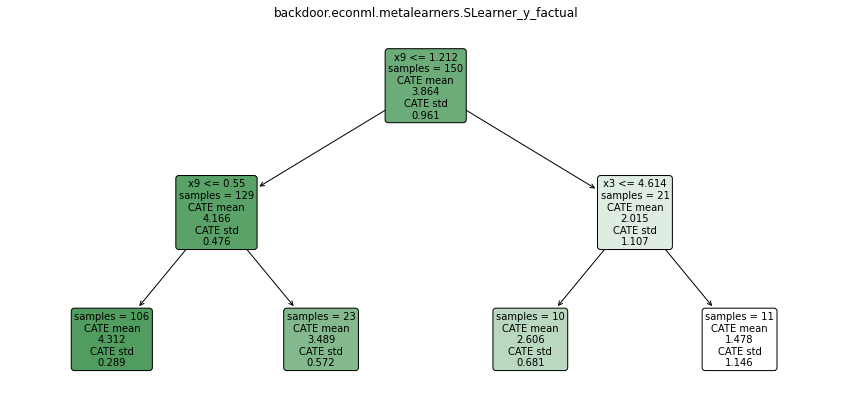

In [10]:
scr = ac.full_scores[ac.best_estimator]
intrp = scr['validation']['intrp']
plt.figure(figsize=(15, 7))
try: 
    feature_names = intrp.feature_names
except:
    feature_names = features_X + [ w for w in features_W if w not in features_X]
intrp.plot(feature_names=intrp.feature_names, fontsize=10)
#         intrp.plot( fontsize=10)
plt.title(f"{ac.best_estimator}_{outcome}")
plt.show()


y_factual backdoor.econml.metalearners.SLearner



Permutation explainer: 101it [00:10,  1.46it/s]                                                                        


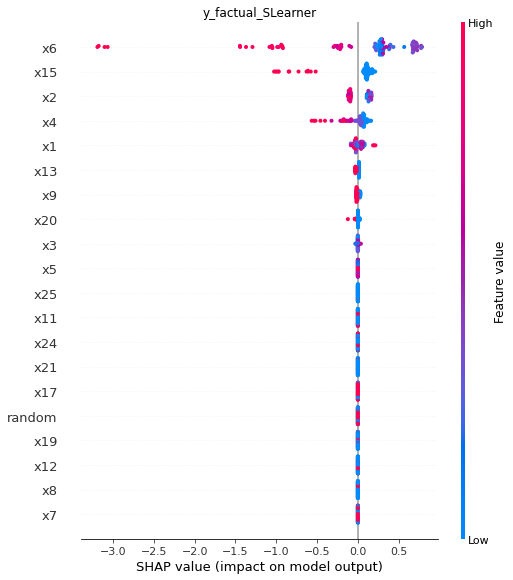

In [11]:
# TODO: add SHAP plots!
import matplotlib.pyplot as plt
import shap

# and now let's visualize feature importances!
from auto_causality.shap import shap_values

# Shapley values calculation can be slow so let's subsample
this_df = ac.test_df.sample(100)

wanted = ["CausalForestDML"]#,"ForestDRLearner","DirectUpliftDoWhyWrapper"]#,"CausalForestDML",]

scr = ac.full_scores[ac.best_estimator]
print(outcome, ac.best_estimator)
est = ac.estimates[ac.best_estimator]
shaps = shap_values(est, this_df)

plt.title(outcome + '_' + ac.best_estimator.split('.')[-1])
shap.summary_plot(shaps, this_df[est.estimator._effect_modifier_names])
plt.show()
